In [16]:
import numpy as np
np.random.seed(123)

a = np.random.choice(4, 12)


In [17]:
np.random.choice(4,12, p=[.4, .1, .1, .4])


array([3, 3, 1, 0, 0, 3, 1, 0, 0, 3, 0, 0])

In [18]:
x = np.random.randint(0, 10, (8, 12))


In [8]:
# sampling individual elements
np.random.choice(x.ravel(), 12)


array([8, 8, 1, 3, 5, 0, 2, 0, 0, 0, 8, 7])

In [9]:
idx = np.random.choice(x.shape[0], 4)
x[idx, :]


array([[3, 8, 6, 3, 3, 3, 5, 5, 8, 6, 6, 2],
       [3, 9, 2, 8, 3, 5, 9, 5, 8, 4, 0, 3],
       [8, 4, 1, 2, 8, 3, 5, 8, 4, 0, 6, 0],
       [1, 0, 1, 3, 8, 2, 8, 8, 1, 3, 6, 1]])

In [10]:
idx

array([1, 7, 3, 6])

In [12]:
x.shape

(8, 12)

In [13]:
# sampling columns
idx = np.random.choice(x.shape[1], 4)
x[:, idx]


array([[2, 5, 8, 1],
       [3, 3, 6, 3],
       [1, 7, 9, 4],
       [3, 8, 1, 8],
       [2, 6, 0, 8],
       [9, 7, 1, 8],
       [2, 8, 1, 1],
       [5, 3, 2, 3]])

In [14]:
# Give the argument replace=False
try:
    np.random.choice(4, 12, replace=False)
except ValueError, e:
    print e


Cannot take a larger sample than population when 'replace=False'


In [19]:
x


array([[7, 2, 4, 8, 0, 7, 9, 3, 4, 6, 1, 5],
       [6, 2, 1, 8, 3, 5, 0, 2, 6, 2, 4, 4],
       [6, 3, 0, 6, 4, 7, 6, 7, 1, 5, 7, 9],
       [2, 4, 8, 1, 2, 1, 1, 3, 5, 9, 0, 8],
       [1, 6, 3, 3, 5, 9, 7, 9, 2, 3, 3, 3],
       [8, 6, 9, 7, 6, 3, 9, 6, 6, 6, 1, 3],
       [4, 3, 1, 0, 5, 8, 6, 8, 9, 1, 0, 3],
       [1, 3, 4, 7, 6, 1, 4, 3, 3, 7, 6, 8]])

In [22]:
# shuffle rows
np.random.shuffle(x)

In [23]:
np.random.shuffle(x.T)
x


array([[3, 7, 5, 2, 9, 6, 9, 3, 3, 3, 1, 3],
       [7, 4, 6, 3, 3, 3, 1, 4, 7, 8, 1, 6],
       [8, 9, 0, 4, 3, 2, 7, 4, 6, 5, 7, 1],
       [1, 1, 2, 5, 3, 4, 1, 8, 9, 8, 2, 0],
       [8, 0, 3, 6, 2, 2, 5, 1, 2, 4, 6, 4],
       [6, 6, 4, 1, 7, 3, 7, 0, 5, 9, 6, 7],
       [0, 6, 5, 9, 8, 3, 8, 1, 1, 3, 4, 0],
       [7, 9, 6, 6, 6, 6, 3, 9, 6, 3, 8, 1]])

In [25]:
# numpy.random.permutation does the same thing but returns a copy

np.random.permutation(x)


array([[3, 7, 5, 2, 9, 6, 9, 3, 3, 3, 1, 3],
       [0, 6, 5, 9, 8, 3, 8, 1, 1, 3, 4, 0],
       [1, 1, 2, 5, 3, 4, 1, 8, 9, 8, 2, 0],
       [8, 0, 3, 6, 2, 2, 5, 1, 2, 4, 6, 4],
       [7, 9, 6, 6, 6, 6, 3, 9, 6, 3, 8, 1],
       [8, 9, 0, 4, 3, 2, 7, 4, 6, 5, 7, 1],
       [7, 4, 6, 3, 3, 3, 1, 4, 7, 8, 1, 6],
       [6, 6, 4, 1, 7, 3, 7, 0, 5, 9, 6, 7]])

In [26]:
# When given an integre n, permutation treats is as the array arange(n)
np.random.permutation(10)


array([4, 0, 6, 7, 5, 1, 8, 2, 3, 9])

In [28]:
# Use indices if you needed to shuffle collections of arrays in synchrony
x = np.arange(12).reshape(4,3)
y = x + 10
idx = np.random.permutation(x.shape[0])
print idx
print x[idx, :], '\n'
print y[idx, :]

[3 0 2 1]
[[ 9 10 11]
 [ 0  1  2]
 [ 6  7  8]
 [ 3  4  5]] 

[[19 20 21]
 [10 11 12]
 [16 17 18]
 [13 14 15]]


Leave some out resampling

Jackknife estimate of parameters

In [33]:
def jackknife(x, func):
    """Jackknife estimate of the estimator func"""
    n = len(x)
    idx = np.arange(n)
    return np.sum(func(x[idx!=i]) for i in range(n))/float(n)

In [34]:
# Jackknife estimate of standard deviation
x = np.random.normal(0, 2, 100)
jackknife(x, np.std)

1.9965505144930473

In [35]:
def jackknife_var(x, func):
    """Jackknife estiamte of the variance of the estimator func."""
    n = len(x)
    idx = np.arange(n)
    j_est = jackknife(x, func)
    return (n-1)/(n + 0.0) * np.sum((func(x[idx!=i]) - j_est)**2.0
                                    for i in range(n))

In [36]:
# estimate of the variance of an estimator
jackknife_var(x, np.std)

0.01593220512973335

Leave one out cross validation (LOOCV)¶

LOOCV also uses the same idiom, and a simple example of LOOCV for model selection is illustrated.



In [37]:
a, b, c = 1, 2, 3
x = np.linspace(0, 5, 10)
y = a*x**2 + b*x + c + np.random.normal(0, 1, len(x))

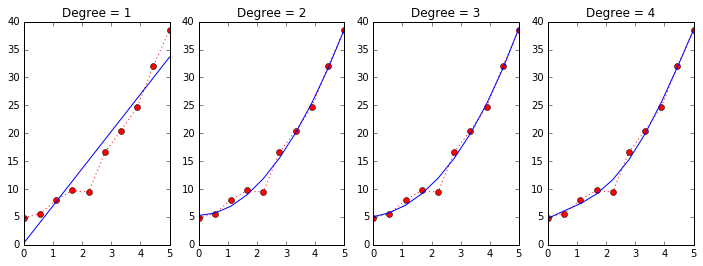

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,4))
for deg in range(1, 5):
    plt.subplot(1, 4, deg)
    beta = np.polyfit(x, y, deg)
    plt.plot(x, y, 'r:o')
    plt.plot(x, np.polyval(beta, x), 'b-')
    plt.title('Degree = %d' % deg)

In [42]:
def loocv(x, y, fit, pred, deg):
    """LOOCV RSS for fitting a polynomial model."""
    n = len(x)
    idx = np.arange(n)
    rss = np.sum([(y - pred(fit(x[idx!=i], y[idx!=i], deg), x))**2.0 for i in range(n)])
    return rss

In [43]:
# RSS does not detect overfitting and selects the most complex model
for deg in range(1, 5):
    print 'Degree = %d, RSS=%.2f' % (deg, np.sum((y - np.polyval(np.polyfit(x, y, deg), x))**2.0))


Degree = 1, RSS=98.60
Degree = 2, RSS=9.93
Degree = 3, RSS=9.69
Degree = 4, RSS=9.04


In [44]:
# LOOCV selects the correct model
for deg in range(1, 5):
    print 'Degree = %d, RSS=%.2f' % (deg, loocv(x, y, np.polyfit, np.polyval, deg))


Degree = 1, RSS=1031.40
Degree = 2, RSS=103.48
Degree = 3, RSS=103.88
Degree = 4, RSS=100.84
